<img src="../img/Logo.png" width="200">

## Introducción a la IA con imágenes
### Asignatura: Computer Vision

### Profesor: Jorge Calvo

# Sumario
- Unidades para visualizar imágenes
- Redes neuronales convolucionales
- Visualización de CNN

## Tensores
- Dato multidimensional (escalar, vector, matriz, tensor)

<img src="../img/tensors.jpeg" width="600">

<img src="../img/3d_tensor.png" width="700">

- Aprendizaje profundo consiste en una serie de transformaciones (operaciones matemáticas con tensores) del input para dar output. 

<img src="../img/sheet_transformacion.png" width="400">

 - **Operacion mas importante**: **Multiplicación de Matrices** *tensor (dot)*
 https://www.europeanvalley.es/noticias/multiplicacion-de-matrices-la-importancia-de-un-algoritmo/

## Redes Neuronales (Redes Convolucionales)

Imaginemos que queremos enseñarle a una computadora a reconocer los rostros de diferentes personas en las imágenes. Una imagen se compone de muchos píxeles, y cada píxel tiene una intensidad de color. Una capa convolucional es como una "ventana" que se desliza por la imagen y busca patrones específicos.

Cuando aplicamos una capa convolucional, creamos pequeños filtros que representan patrones como bordes, esquinas o texturas. Estos filtros son matrices pequeñas que se deslizan por la imagen y se multiplican por los valores de los píxeles que están cubiertos por el filtro.

Por ejemplo, si tenemos un filtro que detecta bordes verticales, se deslizará por la imagen y multiplicará los valores de los píxeles en una pequeña región. Luego, se sumarán estos productos y el resultado se guardará en una nueva imagen. Esto se repite para cada posición en la imagen original.

La idea detrás de las capas convolucionales es que estos filtros aprendan automáticamente qué patrones buscar en la imagen. Durante el entrenamiento, la red neuronal ajusta los valores de los filtros para que sean sensibles a características específicas en las imágenes, como los bordes, las texturas o los detalles importantes de los rostros.

Además, las capas convolucionales pueden tener múltiples filtros, cada uno de los cuales aprende a detectar diferentes características. Por ejemplo, un filtro puede ser sensible a bordes verticales, mientras que otro puede ser sensible a bordes horizontales.

En resumen, una capa convolucional es una parte fundamental de una red neuronal convolucional que permite aprender patrones y características en las imágenes. Estas capas se componen de filtros que se deslizan por la imagen, multiplican los valores de los píxeles y generan nuevas representaciones de la imagen con información más relevante para la tarea que se está resolviendo, como el reconocimiento de rostros.

<img src="../img/CNN.png" width="800">

## Construir redes
- Capas compatibles en las dimensiones output - input

In [27]:
import tensorflow as tf

#Creamos una red de forma secuencial
model = tf.keras.Sequential([

#La primera capa de entrada admite imágenes con la forma 256x256x3 pixeles (3 canales RGB)
#Se le aplica un filtro de (3x3) para detectar alguna caracteristica
tf.keras.layers.Conv2D(64,(3, 3), input_shape=(256,256,3)), 
                 
#Es necesario aplanar la matriz para poder realizar la multiplicación e introducir en la capa Densa
#Lo convertimos en un tensor 1D
tf.keras.layers.Flatten(),    

#Incluimos la capa Dense para realziar una salida de la red y dar un resultado.
tf.keras.layers.Dense(32)
])

## Capa Dense & Flatten
### Capa Dense:

La capa Dense es una capa de neuronas completamente conectadas en una red neuronal. Cada neurona en esta capa está conectada a todas las neuronas de la capa anterior. Esto significa que todas las salidas de la capa anterior se convierten en entradas de cada neurona en la capa Dense.
La capa Dense realiza una operación de multiplicación de matrices entre las entradas y los pesos de la capa, seguida de una función de activación no lineal. Esto permite que la capa Dense aprenda relaciones no lineales entre las características extraídas por las capas anteriores.
La capa Dense se utiliza comúnmente en las capas finales de una red convolucional para realizar la clasificación o regresión final basada en las características extraídas previamente.
En resumen, la capa Dense agrega flexibilidad y capacidad de aprendizaje a la red neuronal convolucional al permitir relaciones no lineales entre las características extraídas.


### Capa Flatten: 
Se utiliza para transformar los datos multidimensionales en un arreglo unidimensional. En el contexto de una red convolucional, esta capa se utiliza para "aplanar" las salidas de las capas convolucionales y de agrupación, que son tensores tridimensionales, en un vector unidimensional.
La capa Flatten conserva la información espacial y la estructura de los datos, pero los presenta en una forma lineal. Esto es necesario para conectar las capas convolucionales con las capas Dense que requieren una entrada unidimensional.
La capa Flatten no realiza ninguna operación matemática ni aprende pesos, simplemente reformatea los datos.
En resumen, la capa Flatten permite pasar los datos de las capas convolucionales a las capas Dense al transformar los tensores multidimensionales en vectores unidimensionales.

In [28]:
# mostrar estructura del modelo
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 flatten_3 (Flatten)         (None, 4129024)           0         
                                                                 
 dense_11 (Dense)            (None, 32)                132128800 
                                                                 
Total params: 132,130,592
Trainable params: 132,130,592
Non-trainable params: 0
_________________________________________________________________


## Convolución

- Capa Dense aprenden patrones globales (en toda la imagen) 
- Capa Convolucional detectan patrones locales

<img src="../img/cnn_representations.jpg" width="800">

Fuente: https://cs.stackexchange.com/questions/16545/what-is-the-difference-between-a-neural-network-a-deep-learning-system-and-a-de

### Cómo lo hacen

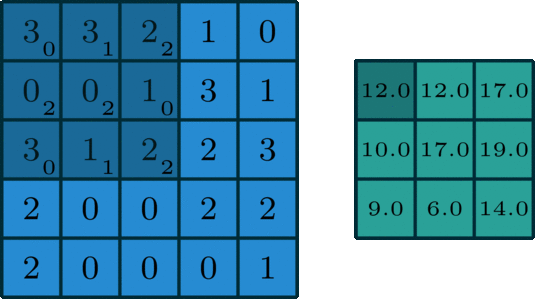

In [12]:
# Fuente: Shafkat, 2018. Acceso el 4 de Enero 2019. https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
from IPython.display import Image
Image(filename="../img/conv_normal.gif")

- Divide el input (3D tensor) en parches y aplica la operación convolución (la misma en cada capa) a cada parche

- Output (3D tensor) es un mapa de features o **mapa de activaciones** (cada una el resultado de aplicar la transformacion). Dicho mapa tendra dimensiones **Height x Width x Nº filtros**. 

- La convolución desliza cada parche sobre el input, parando en cada posible posicion y aplicando la transformacion (función kernel)

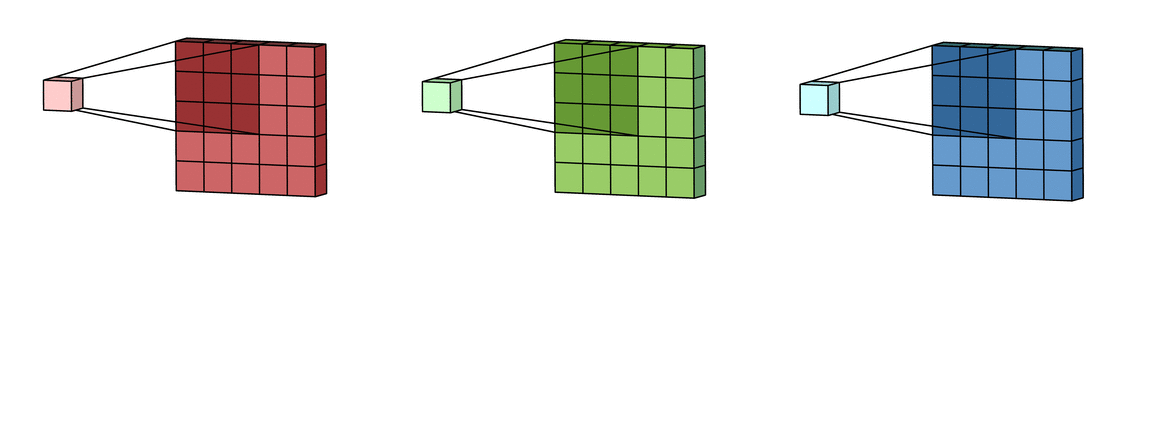

In [13]:
# Fuente: Shafkat, 2018. Acceso el 4 de Enero 2019. https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
Image(filename="../img/conv_multichannel.gif")

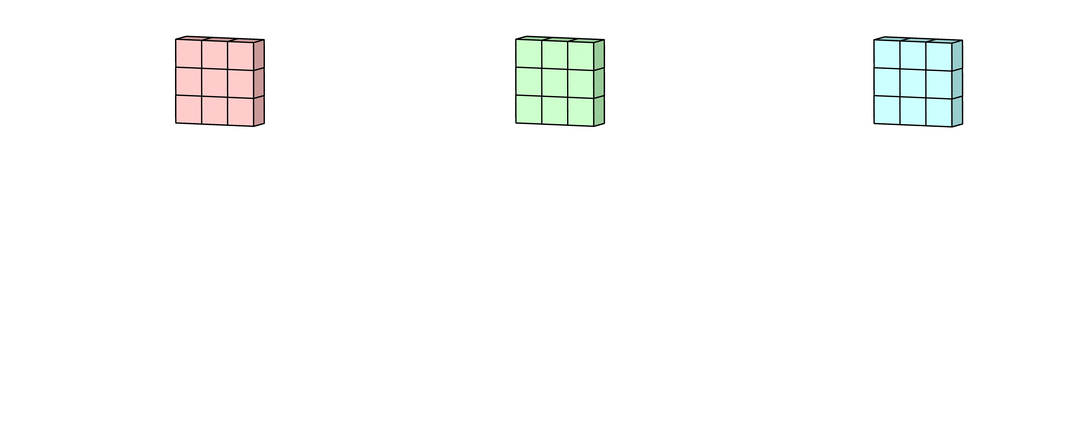

In [14]:
# Fuente: Shafkat, 2018. Acceso el 4 de Enero 2019. https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
Image(filename="../img/conv_multichannel_2.gif")

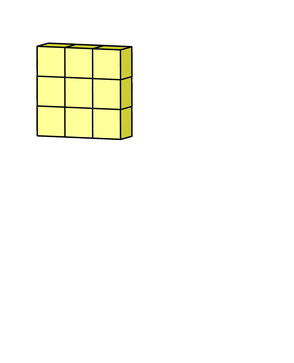

In [15]:
# Fuente: Shafkat, 2018. Acceso el 4 de Enero 2019. https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
Image(filename="../img//bias_cnn.gif")

### Padding 

Padding se refiere a agregar píxeles (normalmente de valor cero) alrededor de la imagen de entrada antes de aplicar la convolución.
El objetivo principal del padding es mantener el tamaño de la imagen a medida que se pasa a través de las capas convolucionales. Esto es especialmente útil cuando se desea preservar la información en los bordes de la imagen.
El padding se puede hacer de dos formas: "same" (mismo tamaño) y "valid" (sin padding). Con "same", se agrega suficiente padding para mantener el tamaño original de la imagen después de aplicar la convolución.

```python
Conv2D(...,padding=<valor>): 'valid' sin padding, 'same' para igualar tamaño input y output feature 
```

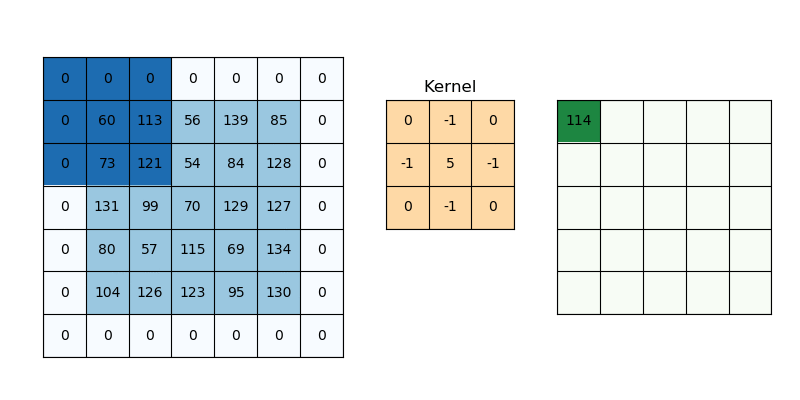

In [16]:
# Fuente: Shafkat, 2018. Acceso el 4 de Enero 2019. https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
Image(filename="../img/Padding.gif")

### Stride
El stride se refiere al número de píxeles que se desplaza el filtro en cada paso durante la convolución.
Un stride de 1 significa que el filtro se desplaza de un píxel a la vez, mientras que un stride de 2 significa que el filtro se desplaza de dos píxeles en cada paso.
Usar un stride mayor que 1 reduce el tamaño de la salida de la convolución, ya que se procesa menos información.

```python
Conv2D(...,stride=<valor>): int, salto entre ventanas 
```

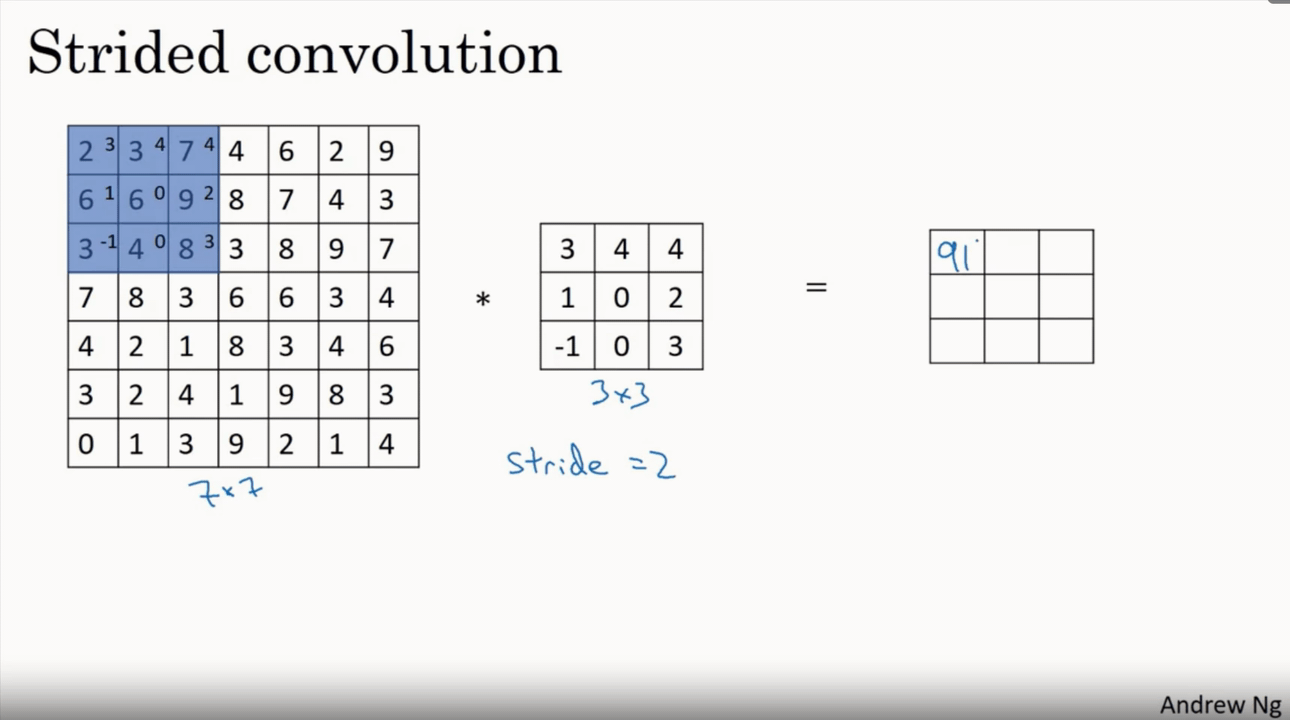

In [18]:
# Fuente: Shafkat, 2018. Acceso el 4 de Enero 2019. https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
Image(filename="../img/Stride.gif", width=700)

### Pooling
* El pooling es una técnica utilizada para reducir la dimensionalidad de las características extraídas por las capas convolucionales.
* La operación de pooling toma una región de la imagen (por ejemplo, una ventana de 2x2) y reduce sus valores a uno solo. Esto se hace utilizando una función de agregación, como el máximo o el promedio.
* El pooling ayuda a disminuir el costo computacional y el sobreajuste, así como a extraer características más importantes y robustas.

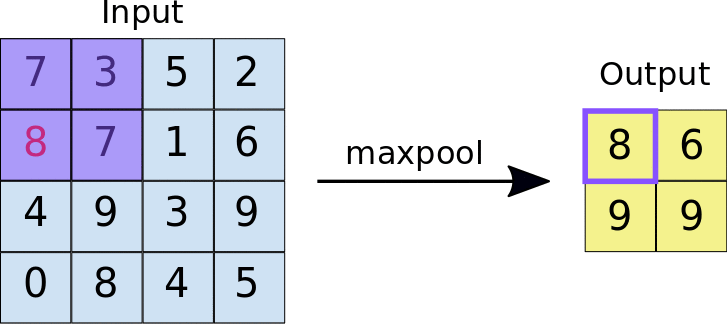

In [29]:
# Fuente: https://nico-curti.github.io/NumPyNet/NumPyNet/layers/maxpool_layer.html
Image(filename="../img/maxpool.gif", width=600)

## Dropout

* Dropout es una técnica de regularización utilizada para prevenir el sobreajuste en las redes neuronales.
* Durante el entrenamiento, se aplica aleatoriamente una probabilidad de "apagar" (ignorar) las neuronas en una capa. Esto evita que las neuronas dependan demasiado de otras neuronas específicas y fomenta una representación más robusta y generalizable de los datos.
* Dropout se puede aplicar después de las capas convolucionales y también después de las capas Dense.

<img src="../img/dropout.gif" width="600">

### Ejemplo CNN

* En este ejemplo, creamos un modelo secuencial que consta de una capa convolucional seguida de maxpooling, dropout y una capa Dense.

* La capa convolucional tiene 32 filtros de tamaño 3x3, con función de activación ReLU y padding='same', lo que agrega padding para mantener el mismo tamaño de la imagen después de la convolución.

* Luego, se aplica maxpooling con un tamaño de ventana de 2x2 para reducir la dimensionalidad y obtener características más importantes.

* Después de maxpooling, se aplica dropout con una probabilidad del 25%, lo que ayuda a prevenir el sobreajuste al ignorar aleatoriamente algunas neuronas durante el entrenamiento.

* Luego, se agrega otra capa convolucional con 64 filtros de tamaño 3x3 y stride de 2x2, lo que reduce aún más la dimensionalidad y captura características más complejas.

* Después de la segunda capa de convolución, se aplica maxpooling y dropout nuevamente.

* A continuación, se aplana la salida de las capas convolucionales para pasar a una capa Dense de 128 neuronas con función de activación ReLU. Se aplica dropout nuevamente con una probabilidad del 50% para prevenir el sobreajuste.

* Finalmente, se agrega una capa Dense de salida con 10 neuronas y función de activación softmax, que se utiliza para la clasificación multiclase.

#### Las Funciones de activación
https://www.linkedin.com/pulse/la-importancia-de-las-funciones-activaci%C3%B3n-en-una-red-calvo-martin/?originalSubdomain=es


In [24]:
import tensorflow as tf

# Crear el modelo secuencial
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2, 2)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Imprimir la información del modelo
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 64)       

### Referencias y Bibliografía

* https://poloclub.github.io/cnn-explainer/
* https://setosa.io/ev/image-kernels/
